In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the data

In [2]:
df = pd.read_csv("/kaggle/input/imdb-india-movies/IMDb Movies India.csv", encoding='ISO-8859-1')

In [3]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(15509, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
df.duplicated().sum()

6

In [8]:
df.dropna(inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [11]:
df.shape

(5659, 10)

In [12]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


**Convert into correct data types**

In [13]:
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [14]:
df.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [15]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


In [17]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


**EDA (EXPLORATORY DATA ANALYSIS)**

In [18]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659.000000,5659.000000,5659,5659.000000,5659.000000,5659,5659,5659,5659
unique,5385,NaN,NaN,376,NaN,NaN,2431,1960,2321,2556
top,Baazi,NaN,NaN,Drama,NaN,NaN,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,NaN,NaN,844,NaN,NaN,41,104,52,57
mean,NaN,1996.247570,133.439124,NaN,5.898533,2697.649585,NaN,NaN,NaN,NaN
std,NaN,19.741839,25.319939,NaN,1.381165,13651.503584,NaN,NaN,NaN,NaN
min,NaN,1931.000000,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,1983.000000,119.000000,NaN,5.000000,30.000000,NaN,NaN,NaN,NaN
50%,NaN,2002.000000,135.000000,NaN,6.100000,131.000000,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,150.000000,NaN,6.900000,922.500000,NaN,NaN,NaN,NaN


**DATA VISUALIZATION**

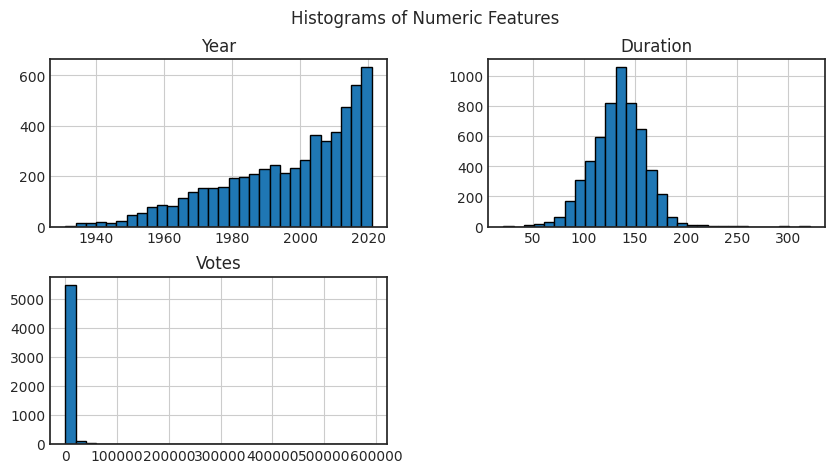

In [19]:
plt.style.use('seaborn-v0_8-white')
df[['Year', 'Duration', 'Votes']].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Histograms of Numeric Features')
plt.show()

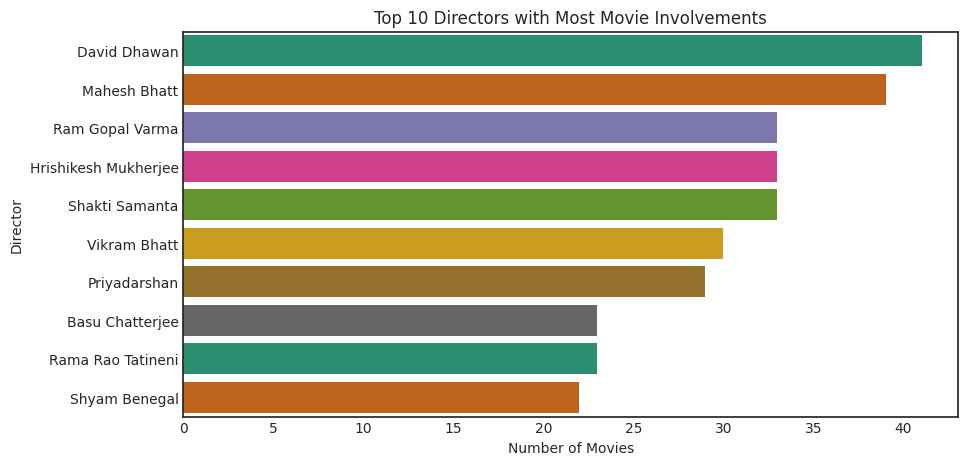

In [20]:
top_10_directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

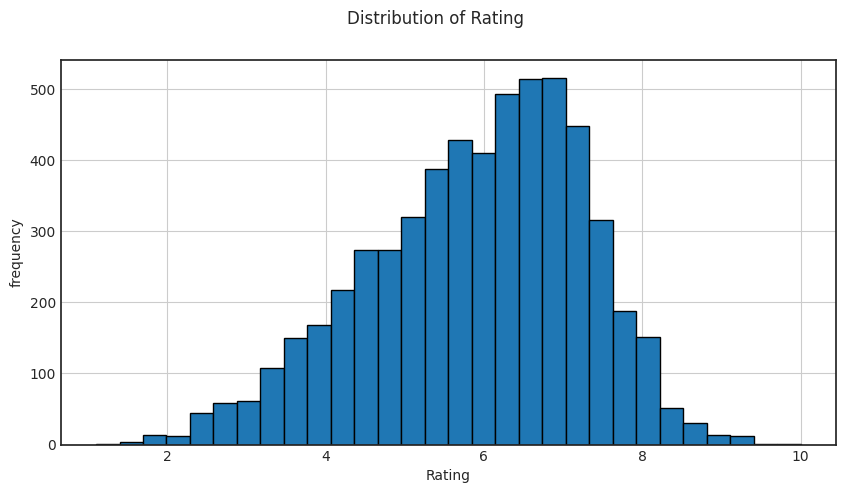

In [21]:
df['Rating'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('frequency')
plt.show()

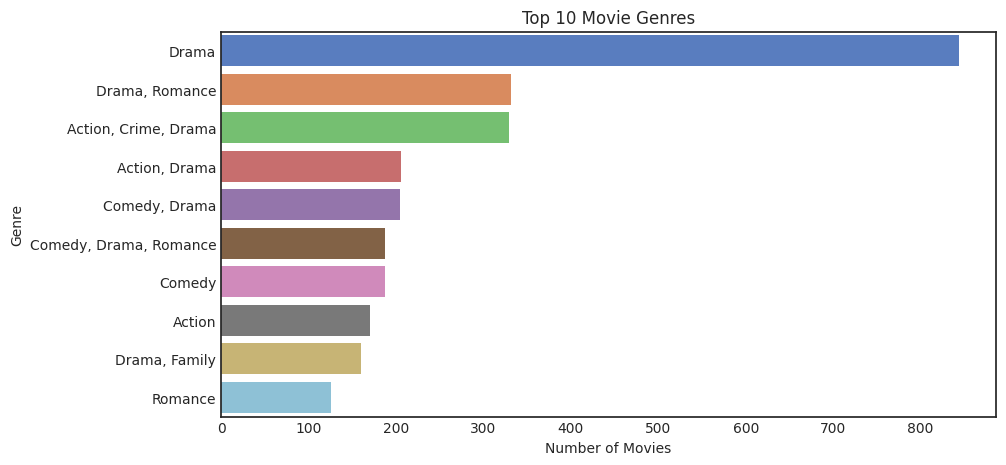

In [22]:
top_10_genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [23]:
combined_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
top_10_actors = combined_actors.value_counts().head(10)
top_10_actors

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
Name: count, dtype: int64

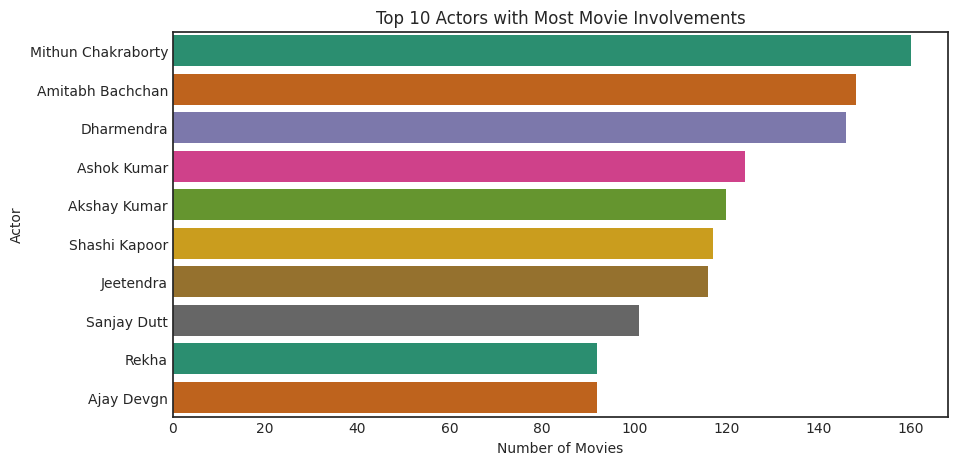

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')
plt.title('Top 10 Actors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

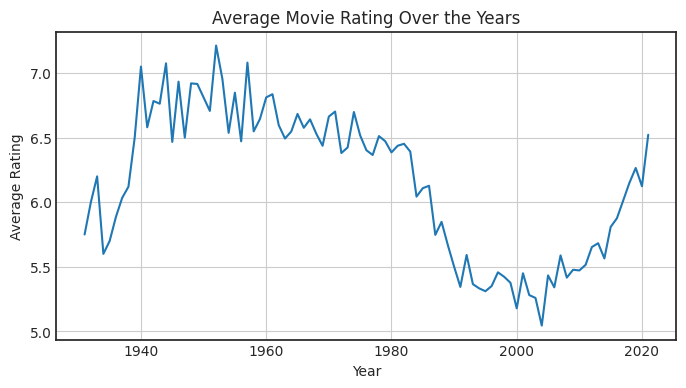

In [25]:
average_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']

plt.figure(figsize=(8, 4))
plt.plot(average_rating_per_year['Year'], average_rating_per_year['Average Rating'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(True)
plt.show()

In [26]:
high_rating_movies = df[df['Rating'] > 8.5]
high_rating_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
967,An Insignificant Man,2016,96,"Documentary, Thriller",8.7,1928,Khushboo Ranka,Vinay Shukla,Arvind Kejriwal,Saurabh Bhardwaj
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1341,Atal Faisla,2018,127,Drama,8.8,5,Abdul Sattar,Sahil Akhtar,Himayat Ali,Aman Jain
1432,Awasaan,2020,101,Drama,8.7,21,Rajat Kumar Chaturvedi,Arjun Chakrabarty,Trishala Idnani,Sarvagya Jain
1469,B for Bundelkhand,2017,117,Drama,8.8,5,Vishal Mourya,Bharat Chawla,Nemi Chandra Jha,Moumita Nandi
1709,Bahattar Hoorain,2019,120,Comedy,8.8,23,Sanjay Puran Singh Chauhan,Narottam Bain,Aamir Bashir,Pawan Malhotra
1729,Baikunth,2021,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
2093,Bhagwan Parshuram,1970,136,Drama,8.7,10,Babubhai Mistry,Niranjan Sharma,Shalini,Trilok Kapoor
2437,Black Rose,2020,120,Thriller,8.6,38,Hemant N Mishra,Samiksha Bhatnagar,Rahul Chawla,Abhilash Dada
2709,Chaar Sahibzaade 2: Rise of Banda Singh Bahadur,2016,134,Animation,8.6,656,Harry Baweja,Harman Baweja,Pawan Kalra,Om Puri


In [27]:
rating_counts = high_rating_movies.groupby('Rating')['Name'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts = rating_counts.sort_values(by='Rating', ascending=False)
rating_counts

,Rating,Number of Movies
10,10.0,1
9,9.7,1
8,9.4,3
7,9.3,7
6,9.2,2
5,9.1,4
4,9.0,5
3,8.9,5
2,8.8,6
1,8.7,8


<Axes: >

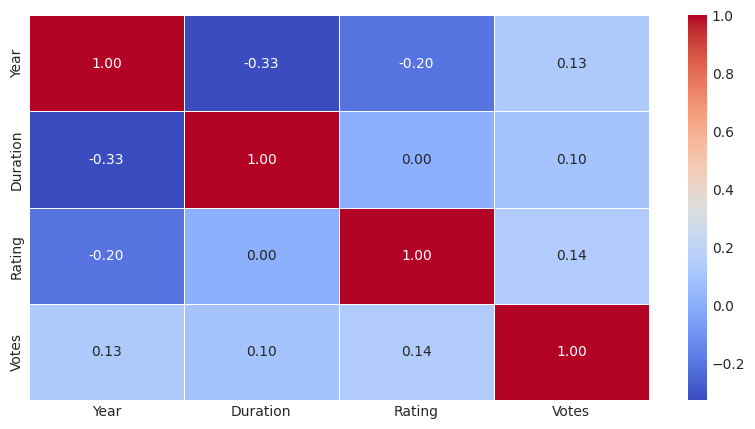

In [28]:
new_df=  df.drop(columns=['Name','Actor 1','Actor 2','Actor 3','Director','Genre'])
corr=new_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)  

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

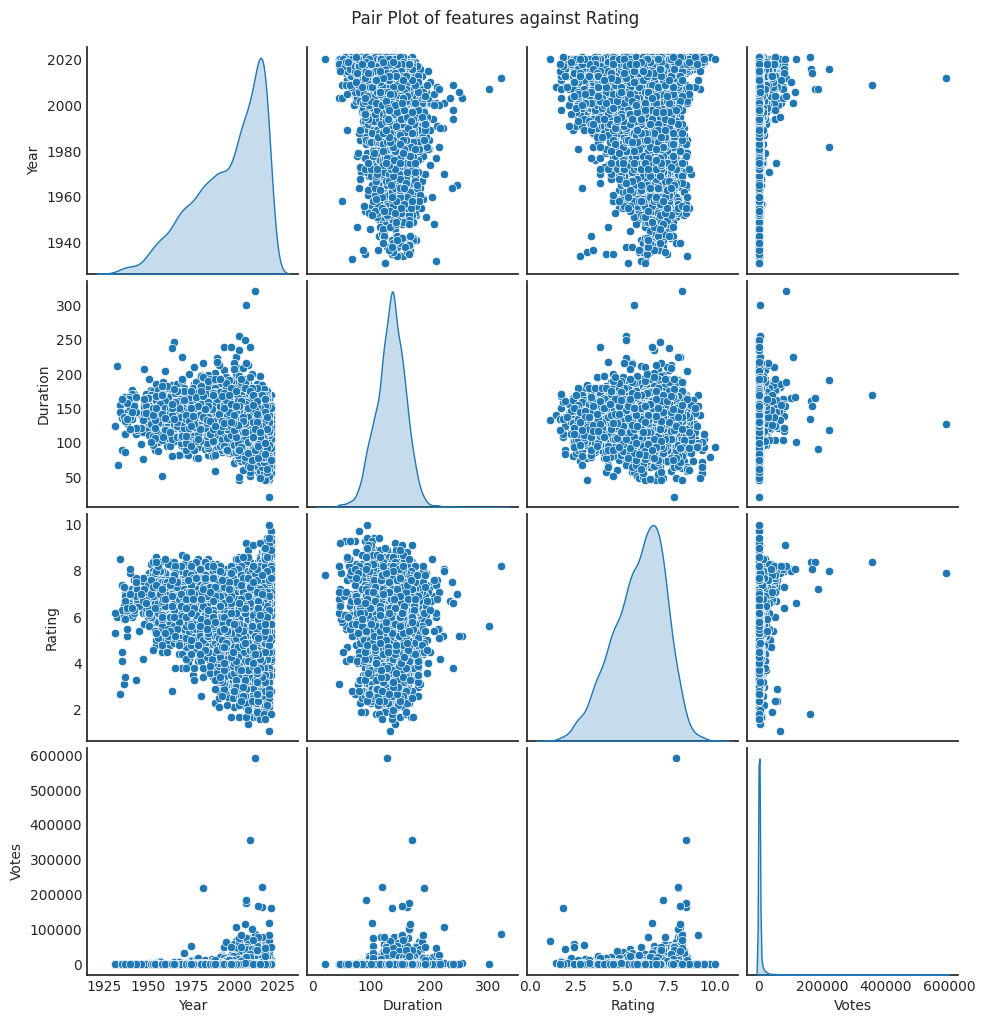

In [29]:
sns.pairplot(new_df,diag_kind='kde')
plt.suptitle(' Pair Plot of features against Rating', y=1.02)
plt.show()

In [30]:
df= df.drop('Name',axis=1)

In [31]:
Genre_Average_Rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Average_Rating'] =Genre_Average_Rating
Director_Average_Rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_Average_Rating'] =Director_Average_Rating
Actor1_Average_Rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_Average_Rating'] =Actor1_Average_Rating
Actor2_Average_Rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_Average_Rating'] =Actor2_Average_Rating
Actor3_Average_Rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_Average_Rating'] =Actor3_Average_Rating
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.415521,6.100000,6.725000,6.100000,5.850000
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.950000,7.250000,4.157143,5.823077,5.954545
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.743465,6.270000,6.307692,5.800000,6.050000
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.516505,5.225000,5.481707,4.640000,5.737500


**DATA SPLITTING**

In [32]:
from sklearn.model_selection import train_test_split
x= df[['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']]
y=df['Rating']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [34]:
train_data= x_train.join(y_train)
train_data

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating,Rating
11859,1962,11,138,5.743465,6.150000,5.885714,5.500000,5.200000,5.2
14634,2020,2057,113,6.007229,5.810000,7.000000,7.060000,7.000000,7.0
6791,1965,44,145,5.624324,6.487500,6.600000,6.340000,6.200000,6.8
14611,2006,1858,188,6.007229,6.100000,6.050000,6.409677,5.872727,5.5
752,1974,174,139,6.007229,6.606061,6.567568,6.462963,6.300000,6.5
...,...,...,...,...,...,...,...,...,...
10881,2014,1147,107,4.648649,6.200000,6.033333,6.200000,6.850000,6.2
9063,2010,126,110,6.620000,5.616667,6.900000,6.900000,6.950000,6.9
6668,1976,11,136,6.416875,5.800000,5.950000,6.640000,6.220000,6.3
3494,1997,1006,180,5.624324,5.596970,5.260656,5.100000,5.456667,5.9


**MODEL BUILDING**

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
x_train, y_train = train_data[['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']], train_data['Rating']
fitted_model_lr = LinearRegression()
fitted_model_lr.fit(x_train,y_train)
y_pred_lr = fitted_model_lr.predict(x_test)
fitted_model_rf = RandomForestRegressor()
fitted_model_rf.fit(x_train, y_train)
y_pred_rf = fitted_model_rf.predict(x_test)

**MODEL EVALUATION**

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE_lr =  mean_squared_error(y_test, y_pred_lr) 
MAE_lr = mean_absolute_error(y_test, y_pred_lr)
R2_Score_lr = r2_score(y_test, y_pred_lr)
print('   Performance Evaluation for Linear Regression Model: ')
print('Mean squared error value is: ', MSE_lr)
print('Mean absolute error value is: ', MAE_lr)
print('R2 score value is: ', R2_Score_lr)
MSE_rf =  mean_squared_error(y_test, y_pred_rf) 
MAE_rf = mean_absolute_error(y_test, y_pred_rf)
R2_Score_rf = r2_score(y_test, y_pred_rf)
print('\n   Performance Evaluation for Random Forest Model: ')
print('Mean squared error value is: ', MSE_rf)
print('Mean absolute error value is: ', MAE_rf)
print('R2 score value is: ', R2_Score_rf)

   Performance Evaluation for Linear Regression Model: 
Mean squared error value is:  0.4501924042521519
Mean absolute error value is:  0.5083685750696058
R2 score value is:  0.7709222048583841

   Performance Evaluation for Random Forest Model: 
Mean squared error value is:  0.38279515901060074
Mean absolute error value is:  0.4230971731448764
R2 score value is:  0.8052169023982072


**ACTUAL V/S PREDICTED ANALYSIS**

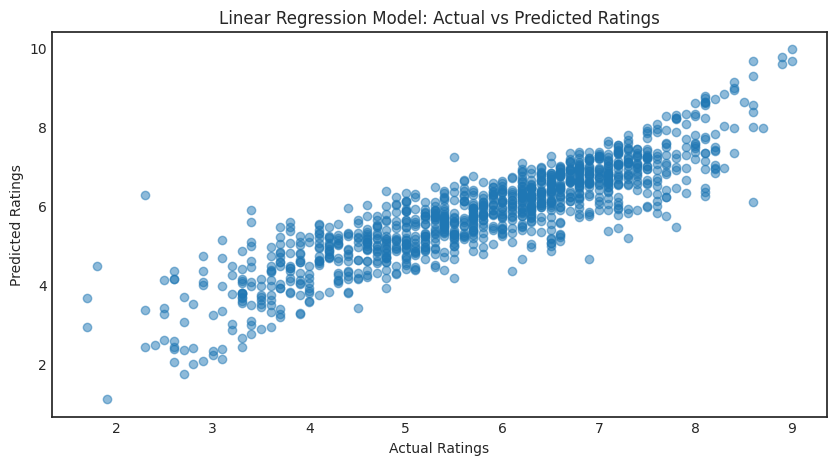

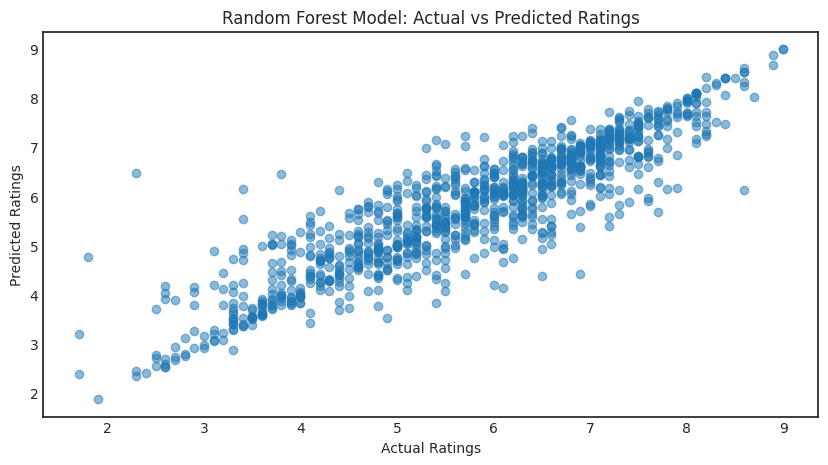

In [37]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

**MODEL TESTING**

In [38]:
x.head(10)

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019,8,109,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,35,110,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,827,147,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,1086,142,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,326,82,5.477778,5.600000,5.600000,5.883333,5.600000
9,2014,11,116,5.337778,4.000000,4.000000,4.550000,4.000000
10,2004,17,96,6.415521,6.200000,5.480000,5.450000,5.233333
11,2016,59,120,4.648649,6.950000,6.066667,5.900000,5.900000
12,1991,983,161,5.400000,4.907143,5.187179,5.976190,5.041667
13,2012,512,166,5.765957,5.700000,6.300000,5.700000,5.700000


In [39]:
y.head(10)

1     7.0
3     4.4
5     4.7
6     7.4
8     5.6
9     4.0
10    6.2
11    5.9
12    6.5
13    5.7
Name: Rating, dtype: float64

In [40]:
data = {'Year': [2018], 'Votes': [100] ,'Duration': [130], 'Genre_Average_Rating':[6.0],'Director_Average_Rating':[6.5],'Actor1_Average_Rating':[5.5],'Actor2_Average_Rating':[5.8],'Actor3_Average_Rating':[5.3]}
trail_data = pd.DataFrame(data)

In [41]:
predict_rating = fitted_model_rf.predict(trail_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  5.701999999999999
